<a href="https://colab.research.google.com/github/Fumio-eisan/cifar10_20200308/blob/master/Chap1_3OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras.layers as layers

In [53]:
inputs = layers.Input((32,32,3))
x = layers.Conv2D(64,3,padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
model = tf.keras.models.Model(inputs, x)

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_26 (ReLU)              (None, 32, 32, 64)        0         
Total params: 2,048
Trainable params: 1,920
Non-trainable params: 128
_________________________________________________________________
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 32, 32, 3)]       0         
____________________________________

In [54]:
inputs = layers.Input((32,32,3))
x = layers.AveragePooling2D(2)(inputs)

model = tf.keras.models.Model(inputs, x)

model.summary()


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 16, 16, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
average_pooling2d_12 (Averag (None, 16, 16, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [0]:
inputs = layers.Input((32,32,3))

x = layers.Conv2D(64,3,padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.AveragePooling2D(2)(x)

x = layers.Conv2D(128,3,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.AveragePooling2D(2)(x)

x = layers.Conv2D(256,3,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

model = tf.keras.models.Model(inputs,x)

In [56]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_27 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d_9 (Average (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_28 (Batc (None, 16, 16, 128)       512

In [0]:
inputs = layers.Input((8,8,256))
x =layers.GlobalAveragePooling2D()(inputs)
x = layers.Dense(10,activation='softmax')(x)
model = tf.keras.models.Model(inputs,x)

In [58]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 8, 8, 256)]       0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 8, 8, 256)]       0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 256)               0         
______________________________________

In [59]:
import matplotlib.pyplot as plt

cifar_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

(X_train, y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


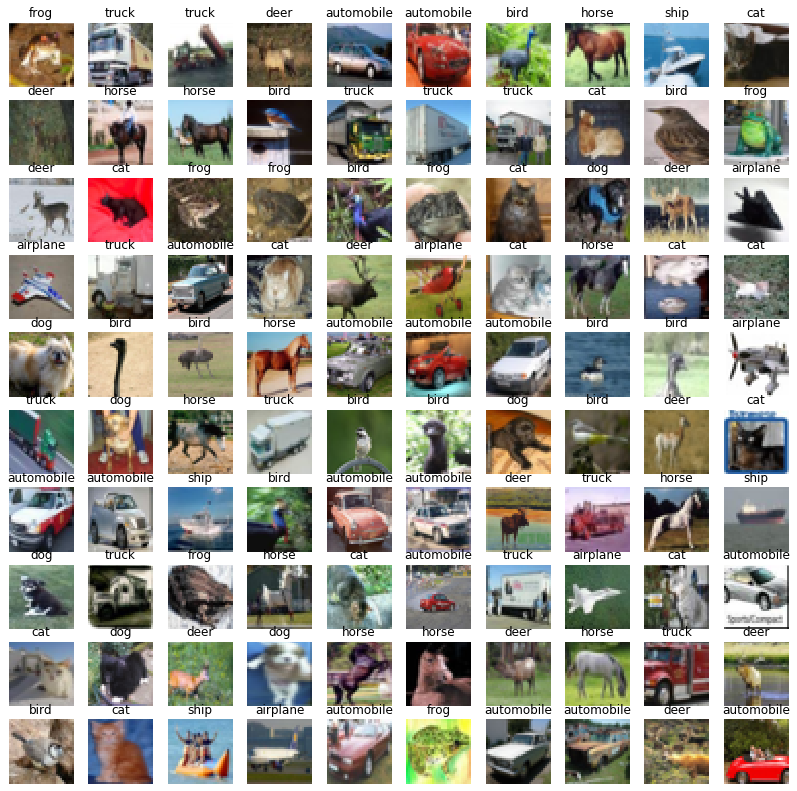

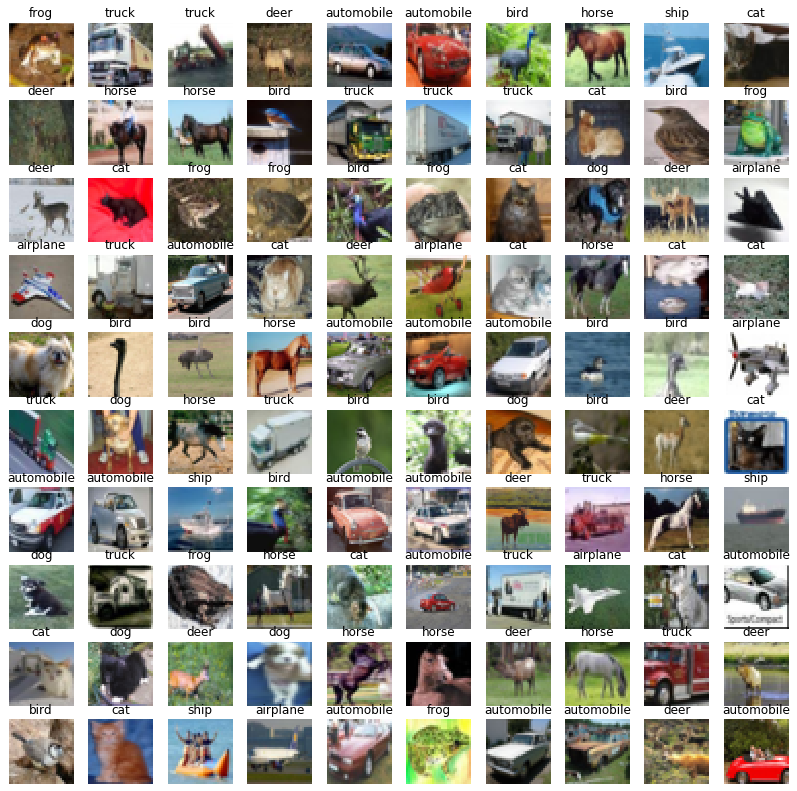

In [60]:
fig = plt.figure(figsize=(14,14))
for i in range(100):
  ax = plt.subplot(10,10,i+1)
  ax.imshow(X_train[i])
  ax.axis('off')
  ax.set_title(cifar_classes[y_train[i,0]])

In [61]:
inputs = layers.Input((32,32,3))
x = inputs

for ch in [1,2,4]:
  for i in range(3):
    x = layers.Conv2D(64*ch,3,padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

x = layers.AveragePooling2D()(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10,activation='softmax')(x)

model = tf.keras.models.Model(inputs,x)
model.summary()


Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_30 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_31 (ReLU)              (None, 32, 32, 64)        0  

In [62]:
import numpy as np

rand_X = np.random.randn(16,32,32,3)
rand_y =  model.predict(rand_X)
print(rand_y.shape)

(16, 10)
(16, 10)


In [63]:
print(np.sum(rand_y,axis=-1))

[0.99999994 1.         1.         1.         0.99999994 0.99999994
 1.         1.         1.0000001  1.         1.         0.99999994
 0.99999994 1.         1.         1.        ]
[1.         1.         1.         1.         1.         1.
 0.99999994 1.         0.99999994 1.         1.         0.99999994
 1.         1.         1.         1.        ]


In [0]:
X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [0]:
model.compile('adam', 'sparse_categorical_crossentropy',['sparse_categorical_crossentropy'])

In [66]:
print(model)

In [50]:
model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 124s 2ms/sample - loss: 1.4570 - sparse_categorical_crossentropy: 1.4570 - val_loss: 2.0489 - val_sparse_categorical_crossentropy: 2.0489
Epoch 2/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 1.0613 - sparse_categorical_crossentropy: 1.0613 - val_loss: 1.2327 - val_sparse_categorical_crossentropy: 1.2327
Epoch 3/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.8722 - sparse_categorical_crossentropy: 0.8722 - val_loss: 1.3179 - val_sparse_categorical_crossentropy: 1.3179
Epoch 4/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.7402 - sparse_categorical_crossentropy: 0.7402 - val_loss: 0.7721 - val_sparse_categorical_crossentropy: 0.7721
Epoch 5/10
50000/50000 [==============================] - 124s 2ms/sample - loss: 0.6488 - sparse_categorical_crossentropy: 0.6488 - val_loss: 0.8604 - val_sparse_cat

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 124s 2ms/sample - loss: 1.4444 - sparse_categorical_crossentropy: 1.4444 - val_loss: 1.1922 - val_sparse_categorical_crossentropy: 1.1922
Epoch 2/10
50000/50000 [==============================] - 122s 2ms/sample - loss: 1.0355 - sparse_categorical_crossentropy: 1.0355 - val_loss: 2.1622 - val_sparse_categorical_crossentropy: 2.1622
Epoch 3/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.8594 - sparse_categorical_crossentropy: 0.8594 - val_loss: 1.0389 - val_sparse_categorical_crossentropy: 1.0389
Epoch 4/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.7505 - sparse_categorical_crossentropy: 0.7505 - val_loss: 0.8963 - val_sparse_categorical_crossentropy: 0.8963
Epoch 5/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.6612 - sparse_categorical_crossentropy: 0.6612 - val_loss: 0.8162 - val_sparse_cat

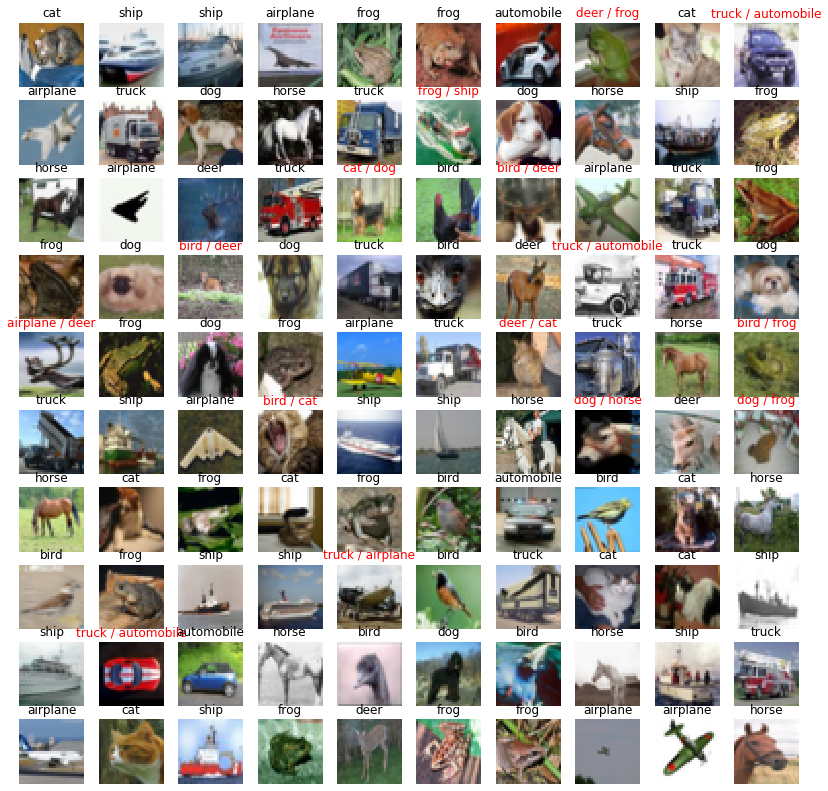

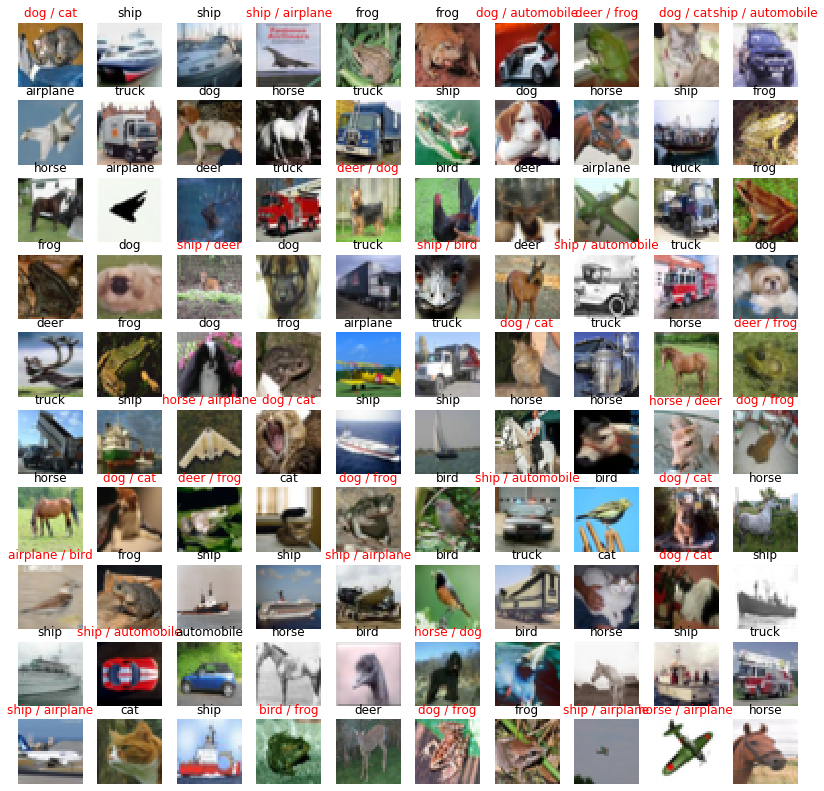

In [51]:
fig = plt.figure(figsize=(14,14))
y_pred = np.argmax(model.predict(X_test), axis=-1) # argmaxで予測ラベル

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(X_test[i])
    ax.axis("off")
    if y_pred[i] == y_test[i,0]:
        ax.set_title(cifar_classes[y_pred[i]])
    else:
        ax.set_title(cifar_classes[y_pred[i]]+" / "+cifar_classes[int(y_test[i,0])], color="red")   